In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [2]:
annotations = pd.read_csv("chinese/chinese_mnist.csv")

In [3]:
X = []
Y = []
codes = [-1 for i in range(15)]

with tqdm(total=annotations.shape[0]) as pbar:
    for index, row in annotations.iterrows():
        suite_id, sample_id, code, value = row[0], row[1], row[2], row[3]
        img = np.array(keras.preprocessing.image.load_img(f"chinese/data/data/input_{suite_id}_{sample_id}_{code}.jpg"))[:,:,0]
        X.append(img)
        Y.append(code - 1)
        codes[code - 1] = value
        pbar.update(1)

X = np.array(X)
X = X.reshape(*X.shape, 1)
Y = np.array(Y)
Y = Y.reshape(*Y.shape, 1)

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:10<00:00, 1496.10it/s]


[10]


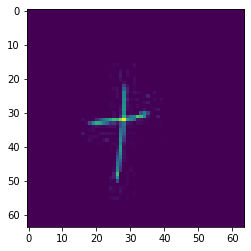

In [123]:
i = 1337

plt.imshow(X[i])
print(Y[i])

In [124]:
print(codes)
print(len(codes))
print(X[0].dtype)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000, 10000, 100000000]
15
uint8


In [125]:
X, Y = shuffle(X, Y)

In [126]:
len(X)

15000

In [127]:
train_size = 12580
valid_size = 2220
test_size = 200

In [128]:
X_train = X[0:train_size]
X_valid = X[train_size:train_size+valid_size]
X_test = X[train_size+valid_size:train_size+valid_size+test_size]
Y_train = Y[0:train_size]
Y_valid = Y[train_size:train_size+valid_size]
Y_test = Y[train_size+valid_size:train_size+valid_size+test_size]

In [129]:
print(len(X_train), len(Y_train), len(X_valid), len(Y_valid), len(X_test), len(Y_test))

12580 12580 2220 2220 200 200


In [130]:
Y_cat_train = to_categorical(Y_train, len(codes))
Y_cat_valid = to_categorical(Y_valid, len(codes))
Y_cat_test = to_categorical(Y_test, len(codes))

In [142]:
model = Sequential()
model.add(Conv2D(16, (5, 5), padding="same", input_shape=(X.shape[1:]), activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(32, (5, 5), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128, (5, 5), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(256, (5, 5), padding="same", activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(len(codes), activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 64, 64, 16)        416       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        12832     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 8, 8, 64)       

In [143]:
result = model.fit(X_train, 
                   Y_cat_train, 
                   validation_data=(X_valid, Y_cat_valid), 
                   batch_size=16, 
                   epochs=20,
                   shuffle=True,
                   verbose=1)

Epoch 1/20
787/787 [==============================] - 139s 176ms/step - loss: 0.7161 - accuracy: 0.7669 - val_loss: 0.1301 - val_accuracy: 0.9617
Epoch 2/20
787/787 [==============================] - 155s 197ms/step - loss: 0.1126 - accuracy: 0.9680 - val_loss: 0.1091 - val_accuracy: 0.9658
Epoch 3/20
787/787 [==============================] - 158s 201ms/step - loss: 0.0791 - accuracy: 0.9771 - val_loss: 0.1750 - val_accuracy: 0.9514ss
Epoch 4/20
787/787 [==============================] - 156s 199ms/step - loss: 0.0528 - accuracy: 0.9855 - val_loss: 0.0604 - val_accuracy: 0.9815
Epoch 5/20
787/787 [==============================] - 159s 203ms/step - loss: 0.0689 - accuracy: 0.9804 - val_loss: 0.0753 - val_accuracy: 0.9833
Epoch 6/20
787/787 [==============================] - 139s 176ms/step - loss: 0.0678 - accuracy: 0.9838 - val_loss: 0.0570 - val_accuracy: 0.9815
Epoch 7/20
787/787 [==============================] - 123s 157ms/step - loss: 0.0425 - accuracy: 0.9895 - val_loss: 0.0430

In [144]:
# starting from epoch 4 it doesn't make much sense to continue, but anyway

In [145]:
model.save_weights('weights_chinese')
model.save('model_chinese.h5')

the code is 0 so the values is 0
approx code is 0 so predicted value is 0


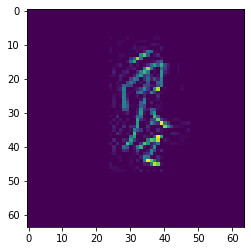

In [173]:
i = 0

plt.imshow(X_test[i])
print("the code is", Y_test[i][0], "so the values is", codes[Y_test[i][0]])

res = model.predict(X_test[i].reshape(1, 64, 64, 1), 1)
print("approx code is", np.argmax(res), "so predicted value is", codes[np.argmax(res)])

In [175]:
# testing using test dataset with no changes

predictions = np.argmax(model.predict(X_test), 1)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        14
           4       1.00      0.91      0.95        11
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        14
          11       0.91      1.00      0.95        10
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        15

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00   

In [176]:
model.evaluate(X_test, Y_cat_test)

7/7 [==============================] - 0s 63ms/step - loss: 0.0126 - accuracy: 0.9950 0s - loss: 0.0033 - accuracy: 


[0.012577047571539879, 0.9950000047683716]

In [4]:
model = tf.keras.models.load_model("model_chinese.h5")

In [5]:
drawing = False
pt1_x = None
pt1_y = None
gthickness = 5
text = ""


def mouse_callback(event, x, y, flags, param):
    global pt1_x, pt1_y, gthickness, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pt1_x, pt1_y = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(image, (pt1_x, pt1_y), (x, y), color=(255, 255, 255), thickness=gthickness)
            pt1_x, pt1_y = x, y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(image, (pt1_x, pt1_y), (x, y), color=(255, 255, 255), thickness=gthickness)


blank = np.zeros((256, 256, 3), np.uint8)
image = blank.copy()
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback)

saved_images = []
saved_predictions = []

while True:
    cv2.imshow("Image", image)
    cv2.putText(image, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))
    
    key = cv2.waitKey(8)
    if key == ord('q'):
        break
    elif key == ord('c'):
        image = blank.copy()
        text = ""
    elif key == ord('a'):
        gthickness += 1
        print("+ New thickness:", gthickness)
    elif key == ord('s'):
        gthickness -= 1
        print("- New thickness:", gthickness)
    elif key == ord('t'):
        pimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        pimg = cv2.resize(pimg, (64, 64))
        pimg = pimg.reshape(1, 64, 64, 1)
        prediction = np.argmax(model.predict(pimg), 1)
        saved_images.append(pimg)
        saved_predictions.append(pimg)
        text = str(codes[prediction[0]])

cv2.destroyAllWindows()